Worksheet-2: Exploratory Data Analysis with Pandas -Part-1.
3 To - Do - Task
3.1 Warming Up Exercises - Basic Inspection and Exploration:
Problem 1 - Data Read, Write and Inspect:

Complete all following Task:

• Dataset for the Task: "bank.csv"

Load the provided dataset and import in pandas DataFrame.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Check info of the DataFrame and identify following:
(a) columns with dtypes=object

(b) unique values of those columns.

(c) check for the total number of null values in each column.

In [5]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Concept and Technology of AI/bank.csv")
print(df.head())

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  


In [6]:
#a
cols = df.select_dtypes(include='object').columns
print("Object columns:\n", cols)

Object columns:
 Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')


In [21]:
unique = df[cols].nunique()
print("Unique values:\n", unique)

Unique values:
 job          12
marital       3
education     4
default       2
housing       2
loan          2
contact       3
month        12
poutcome      4
y             2
dtype: int64


In [9]:
#c
null = df.isnull().sum()
print("Null value counts:\n", null)


Null value counts:
 age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


Drop all the columns with dtypes object and store in new DataFrame, also write the DataFrame in ”.csv” with name ”banknumericdata.csv”


In [10]:
numeric_df = df.drop(columns= cols)
numeric_df.to_csv("banknumericdata.csv", index=False)
print("Numeric DataFrame is saved as 'banknumericdata.csv'")

Numeric DataFrame is saved as 'banknumericdata.csv'


Read ”banknumericdata.csv” and Find the summary statistics.

In [11]:
numeric_df2 = pd.read_csv("banknumericdata.csv")
print("\nSummary Statistics:")
print(numeric_df2.describe())


Summary Statistics:
                age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%   

Problem 2 - Data Imputations:
Complete all the following Task:

• Dataset for the Task: "medical_student.csv"

1. Load the provided dataset and import in pandas DataFrame.

In [26]:
df = pd.read_csv("/content/drive/MyDrive/Concept and Technology of AI/medical_students_dataset.csv")
print(df.head())

   Student ID   Age  Gender      Height     Weight Blood Type        BMI  \
0         1.0  18.0  Female  161.777924  72.354947          O  27.645835   
1         2.0   NaN    Male  152.069157  47.630941          B        NaN   
2         3.0  32.0  Female  182.537664  55.741083          A  16.729017   
3         NaN  30.0    Male  182.112867  63.332207          B  19.096042   
4         5.0  23.0  Female         NaN  46.234173          O        NaN   

   Temperature  Heart Rate  Blood Pressure  Cholesterol Diabetes Smoking  
0          NaN        95.0           109.0        203.0       No     NaN  
1    98.714977        93.0           104.0        163.0       No      No  
2    98.260293        76.0           130.0        216.0      Yes      No  
3    98.839605        99.0           112.0        141.0       No     Yes  
4    98.480008        95.0             NaN        231.0       No      No  


2. Check info of the DataFrame and identify column with missing (null) values.

In [14]:
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None
age          0
job          0
marital      0
education    0
default      0
balance      0
hous

3. For the column with missing values fill the values using various techniques we discussed above. Try to explain why did you select the particular methods for particular column.


In [27]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['BMI'] = df['BMI'].fillna(df['BMI'].median())
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
print(df.isnull().sum())

Student ID        20000
Age                   0
Gender                0
Height            20000
Weight            20000
Blood Type        20000
BMI                   0
Temperature       20000
Heart Rate        20000
Blood Pressure    20000
Cholesterol       20000
Diabetes          20000
Smoking           20000
dtype: int64


4. Check for any duplicate values present in Dataset and do necessary to manage the duplicate items. {Hint: dataset.duplicated.sum()}

In [28]:
print("Number of duplicate rows:", df.duplicated().sum())
df = df.drop_duplicates()
print("After removal, duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 8506
After removal, duplicate rows: 0


3.2 Exercises - Data Cleaning and Transformations with ”Titanic Dataset”:                    

Dataset Used: "titanic.csv"

Problem - 1: Create a DataFrame that is subsetted for the columns ’Name’, ’Pclass’, ’Sex’, ’Age’, ’Fare’, and ’Survived’. Retain only those rows where ’Pclass’ is equal to 1, representing first-class passengers. What is the mean, median, maximum value, and minimum value of the ’Fare’ column?

In [30]:
df = pd.read_csv("/content/drive/MyDrive/Concept and Technology of AI/Titanic-Dataset.csv")
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [31]:
titanic = df[['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']]
print(titanic.head())

                                                Name  Pclass     Sex   Age  \
0                            Braund, Mr. Owen Harris       3    male  22.0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...       1  female  38.0   
2                             Heikkinen, Miss. Laina       3  female  26.0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)       1  female  35.0   
4                           Allen, Mr. William Henry       3    male  35.0   

      Fare  Survived  
0   7.2500         0  
1  71.2833         1  
2   7.9250         1  
3  53.1000         1  
4   8.0500         0  


In [32]:
First_class = titanic[titanic['Pclass'] == 1]
print(First_class.head())



                                                 Name  Pclass     Sex   Age  \
1   Cumings, Mrs. John Bradley (Florence Briggs Th...       1  female  38.0   
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)       1  female  35.0   
6                             McCarthy, Mr. Timothy J       1    male  54.0   
11                           Bonnell, Miss. Elizabeth       1  female  58.0   
23                       Sloper, Mr. William Thompson       1    male  28.0   

       Fare  Survived  
1   71.2833         1  
3   53.1000         1  
6   51.8625         0  
11  26.5500         1  
23  35.5000         1  


In [33]:
Fare_mean = First_class['Fare'].mean()
Fare_median = First_class['Fare'].median()
Fare_max = First_class['Fare'].max()
Fare_min = First_class['Fare'].min()

print("First-Class Passengers:")
print(f"Mean: {Fare_mean}")
print(f"Median: {Fare_median}")
print(f"Maximum: {Fare_max}")
print(f"Minimum: {Fare_min}")


First-Class Passengers:
Mean: 84.1546875
Median: 60.287499999999994
Maximum: 512.3292
Minimum: 0.0


Problem - 2: How many null values are contained in the ’Age’ column in your subsetted DataFrame? Once you’ve found this out, drop them from your DataFrame.

In [34]:
null_age_count = titanic ['Age'].isnull().sum()
print("Number of null values (Age):", null_age_count)

titanic_subset_clean = titanic .dropna(subset=['Age'])
print("Null (Age) after dropping:", titanic_subset_clean['Age'].isnull().sum())


Number of null values (Age): 177
Null (Age) after dropping: 0


Problem - 3:

The ’Embarked’ column in the Titanic dataset contains categorical data representing the ports of embarka- tion:

• ’C’ for Cherbourg

• ’Q’ for Queenstown

• ’S’ for Southampton

Task:

1. Use one-hot encoding to convert the ’Embarked’ column into separate binary columns (’Embarked C’, ’Embarked Q’, ’Embarked S’).
2. Add these new columns to the original DataFrame.
3. Drop the original ’Embarked’ column.
4. Print the first few rows of the modified DataFrame to verify the changes.

In [36]:
df = pd.read_csv("/content/drive/MyDrive/Concept and Technology of AI/Titanic-Dataset.csv")

print("Unique Embarked values:", df['Embarked'].unique())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
embarked_dummies = pd.get_dummies(df['Embarked'], prefix="Embarked")
df = pd.concat([df, embarked_dummies], axis=1)
df = df.drop('Embarked', axis=1)
print(df.head())

Unique Embarked values: ['S' 'C' 'Q' nan]
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin  Embarked_C  Embarked_Q  Embarked_S  
0      0         A/5 21171   7.2500   NaN       False       False        True  
1      0          PC 17599  71.2833   C85        True       False       False  
2      0  STON/O2. 3101282   7.9250   

Problem - 4:

Compare the mean survival rates (’Survived’) for the different groups in the ’Sex’ column. Draw a visual- ization to show how the survival distributions vary by gender.

In [37]:
mean_survival_by_sex = df.groupby('Sex')['Survived'].mean()
print(mean_survival_by_sex)

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


Draw a visualization that breaks your visualization from Exercise 3 down by the port of embarkation (’Em- barked’). In this instance, compare the ports ’C’ (Cherbourg), ’Q’ (Queenstown), and ’S’ (Southampton).

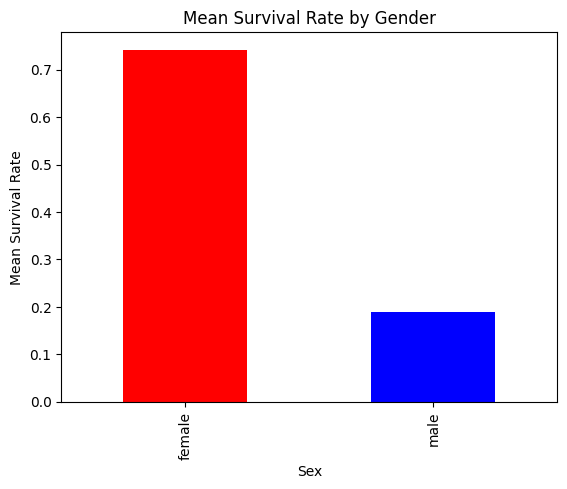

In [38]:

import matplotlib.pyplot as plt
mean_survival_by_sex.plot(kind='bar', color=['red','blue'], title='Mean Survival Rate by Gender')
plt.ylabel('Mean Survival Rate')
plt.show()